<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning/blob/master/section-2/toy_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a Toy Neural Network Problem

We are going to use the very same example that we've seen in the previous video with the house price based on it's area:


![input-example](https://user-images.githubusercontent.com/5733246/52136634-a2e8e080-262f-11e9-8f7a-61d79831d83d.png)


Usually when working with Machine Learning or Deep Learning problems, you will have to follow those five steps:
1. Exploring the data
    - Importing data
    - Understanding the data
2. Preparing the data
    - Scaling
    - Transforming
    - One-Hot Encoding
    - Train/Test Split 
3. Developing a Base Model
4. Checking Predictions
5. Improving Results

Let's check some of them here! 


## 1. Import the Data

Let's create a toy dataset with only 20 areas and 20 prices

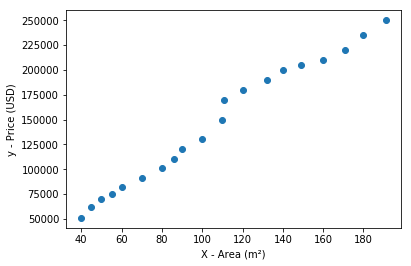

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# House areas (feature)
X = np.array([40, 45, 50, 55, 60, 70, 80, 86, 90, 100, 110, 111, 120, 132, 140, 149, 160, 171, 180, 191]).reshape(-1, 1)

# House prices (prediction variable)
y = np.array([51000, 62000, 70100, 75245, 82200, 91200, 101000, 110200, 120000, 130000, 150000, 170000, 180000, 190000, 200000, 205000, 210000, 220000, 235000, 250000]).reshape(-1, 1)

# Visualize X and Y
plt.scatter(X, y)
plt.xlabel("X - Area (m²)")
plt.ylabel("y - Price (USD)")
plt.show()

## 2. Preparing the Data

### Scaling Numerical Features
Optimizers usually work better when the input data ranges from either -1 to 1 or 0 to 1. This helps the error surface to approach faster to its global minima. For better results, the [Standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is highly suggested for having a data with zero mean and a standard deviation of 1:

The mean of X is 107.0 The Standard Deviation of X is 46.0
Applying standardization...
The mean of X is 0.0 The Standard Deviation of X is 1.0


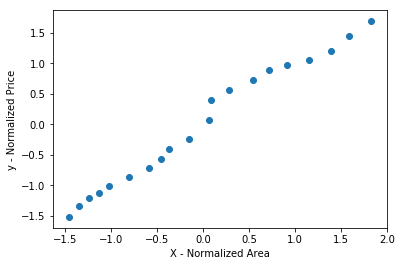

In [0]:
from sklearn.preprocessing import StandardScaler

# Check mean and standard deviation before
print("The mean of X is {:.1f} The Standard Deviation of X is {:.1f}".format(np.mean(X), np.std(X)))

# Apply transformation
print("Applying standardization...")
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

# Check mean and standard deviation after
print("The mean of X is {:.1f} The Standard Deviation of X is {:.1f}".format(np.mean(X), np.std(X)))


# Visualize again
plt.scatter(X, y)
plt.xlabel("X - Normalized Area")
plt.ylabel("y - Normalized Price")
plt.show()

### Splitting data into Training and Testing sets

Besides scaling the data, it is quite important to split the dataset into training and testing subsets. The training set is going to be used for defining the model (or the decision boundary) and the test set is going to be used for evaluating its performance on unseen data. If we don't use a test set, there's a risk of **overfitting** which is illustrated in the following image:

![underfit](https://user-images.githubusercontent.com/5733246/52140129-23600f00-2639-11e9-8c03-308823791377.png)

The train/test split can be performed using train_test_split from sklearn:

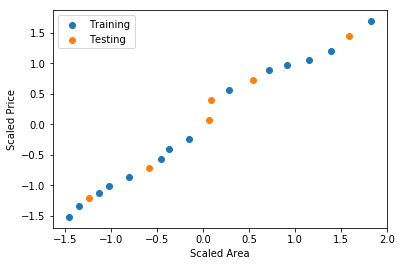

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

# Visualize again
plt.scatter(X_train, y_train, label="Training")
plt.scatter(X_test, y_test, label="Testing")
plt.legend(loc=0)
plt.xlabel("Scaled Area")
plt.ylabel("Scaled Price")
plt.show()

## 3. Developing a Base Model

Let's now use Keras in order to build our first model. First of all, [why keras instead of Tensorflow?](https://colab.research.google.com/drive/14JiUzHH2jaFixSOOuWPwKTfj2fXuwD8Q).

When defining a model, there are three major components that you have to be aware:
1. Model's architecture: How are layers stacked on each other? Which layers are going to be used?
    - Documentation of Layers: https://keras.io/layers/core/
    - Guide sequential models: https://keras.io/getting-started/sequential-model-guide/
    
2. Optimizers and loss function.
    - Documentation of optimizers: https://keras.io/optimizers/
    - Documentation of types of loss functions: https://keras.io/losses/
    - Compile method: https://keras.io/models/sequential/#compile

3. Training the model
    - Fit method: https://keras.io/models/sequential/#fit


Based on the previous documentations, let's define the base model as a single neuron with only one weight and one bias in the following way:
![](https://user-images.githubusercontent.com/5733246/52482541-ad0f5f80-2b98-11e9-927c-a37ead68bf90.png)

[This reference](https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc) can be helpful for defining a model.


In [0]:
# 0. Import keras dependencies 
# TODO: Import the sequential model - https://keras.io/getting-started/sequential-model-guide/

# TODO: Import the dense layer - https://keras.io/layers/core/

# TODO: Import the SGD optimizer - https://keras.io/optimizers/

# 1. Define your base model here
# TODO: Assign Sequential to model and create a list with just one Dense layer with one unit and one input
model = None

# 2. Set your optimizer and loss function here
# TODO: Initialize the Stochastic Gradient Descent optimizer

# TODO: Use the model.compile method with the inputs 'optimizer' and 'loss'
model.compile(...)

# 3. Train your model
# TODO: Use the model.fit method with the the training data as input
model.fit(...)

Solution:

In [0]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
opt = SGD()
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train)

Epoch 1/1
14/14 [==============================] - 0s 13ms/step - loss: 0.5288


## 4. Checking Predictions
Now let's check how well our base prediction is performing:

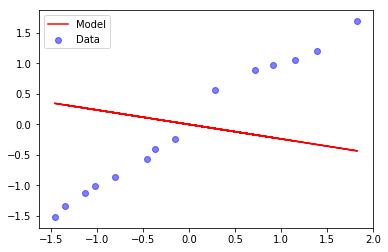

In [0]:
def check_predictions(model, X, y):
    y_pred = model.predict(X)
    plt.scatter(X, y, c='b', alpha=0.5, label="Data")
    plt.plot(X, y_pred, c='r', label="Model")
    plt.legend(loc=0)
    plt.show()
    
check_predictions(model, X_train, y_train)

## 5. Improving Results
We can see that the model is not fitting well in the dataset. Let's now improve those results! Here are some basic things that we will try:

1. Increase the number of epochs
    - Epochs is the number of times the algorithm sees the entire data set. For simplicity, you can think here as the number of iterations of the weight
2. Changing the optimizer
    - Stochastic gradient descent is a very simple optimizers. There are more robusts optimizers such as Adam
4. Changing the learning rate


### 5.1 Increasing the number of epochs

In [0]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
opt = SGD()
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
14/14 [==============================] - 0s 31ms/step - loss: 5.0278
Epoch 2/20
14/14 [==============================] - 0s 323us/step - loss: 4.8108
Epoch 3/20
14/14 [==============================] - 0s 166us/step - loss: 4.6032
Epoch 4/20
14/14 [==============================] - 0s 208us/step - loss: 4.4046
Epoch 5/20
14/14 [==============================] - 0s 186us/step - loss: 4.2145
Epoch 6/20
14/14 [==============================] - 0s 251us/step - loss: 4.0327
Epoch 7/20
14/14 [==============================] - 0s 169us/step - loss: 3.8588
Epoch 8/20
14/14 [==============================] - 0s 159us/step - loss: 3.6924
Epoch 9/20
14/14 [==============================] - 0s 194us/step - loss: 3.5332
Epoch 10/20
14/14 [==============================] - 0s 309us/step - loss: 3.3810
Epoch 11/20
14/14 [==============================] - 0s 216us/step - loss: 3.2353
Epoch 12/20
14/14 [==============================] - 0s 746us/step - loss: 3.0959
Epoch 13/20
14/14 [=======

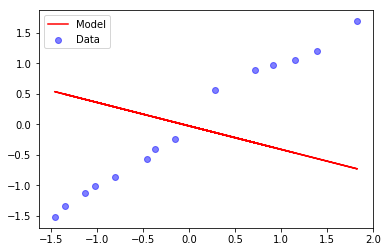

In [0]:
check_predictions(model, X_train, y_train)

### 5.2 Checking other optimizers
Here's a great repository comparing different optimizers from TensorFlow: https://github.com/Jaewan-Yun/optimizer-visualization
![](https://github.com/Jaewan-Yun/optimizer-visualization/raw/master/figures/movie11.gif)

![](https://github.com/Jaewan-Yun/optimizer-visualization/raw/master/figures/movie9.gif)


Let's now try other optimizers that are available from the documentation: https://keras.io/optimizers/

In [0]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer loss function here
opt = Adam()
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, epochs=20)

In [0]:
check_predictions(model, X_train, y_train)

### 5.3 Tuning the Learning Rate
Finally let's enhance the learning rate. As a reminder, small values requires more iterations while large values make the model to diverge. 

In [0]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
opt = Adam(lr=0.1) # Default of adam is 0.001. Check large and small values, use a value slighly lower than a diverging lr
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, epochs=20)

In [0]:
check_predictions(model, X_train, y_train)

## Final considerations
Finally, we can also try using more layers in the model. However, we are going to discuss this in the next video, after checking the different activation functions that can be used. 